In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV

In [3]:
data=pd.read_csv('data.csv')

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
data.shape

(569, 33)

In [7]:
data.drop(['id','Unnamed: 32'],axis=1,inplace=True)

Benign 357
Malignant 212


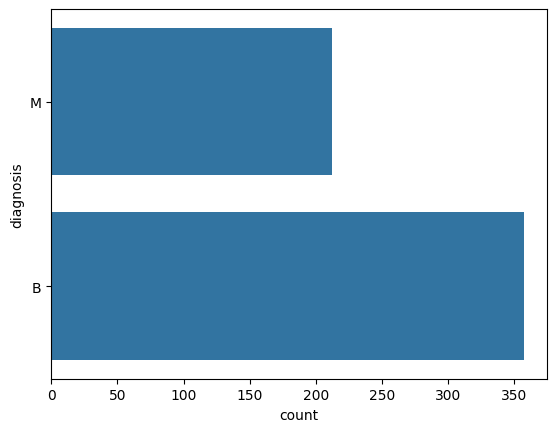

In [8]:
ax=sns.countplot(data['diagnosis'],label='Count')
B,M= data['diagnosis'].value_counts()
print("Benign", B)
print("Malignant", M)

In [9]:
#Splitting data into features and label
y=data['diagnosis']
X=data.drop('diagnosis',axis=1)

In [10]:
#plotting of graphs
def draw_multivarient_plot(data,rows,cols,plot_type):
    column_names=data.columns.values
    number_of_column=len(column_names)
    fig,axarr=plt.subplots(rows,cols, figsize=(22,16))
    counter=0
    for i in range(rows):
        for j in range(cols):
            if 'violin' in plot_type:
                sns.violinplot(x='diagnosis',y=column_names[counter],data=data,ax=axarr[i][j])
            elif 'box' in plot_type:
                sns.boxplot(x='diagnosis',y=column_names[counter],data=data,ax=axarr[i][j])
            counter+=1
            if counter==(number_of_column-1):
                break  

In [11]:
data_label_encoded= data.apply(preprocessing.LabelEncoder().fit_transform)
data_label_encoded['diagnosis'].value_counts()
#0=benign, 1=malignant

diagnosis
0    357
1    212
Name: count, dtype: int64

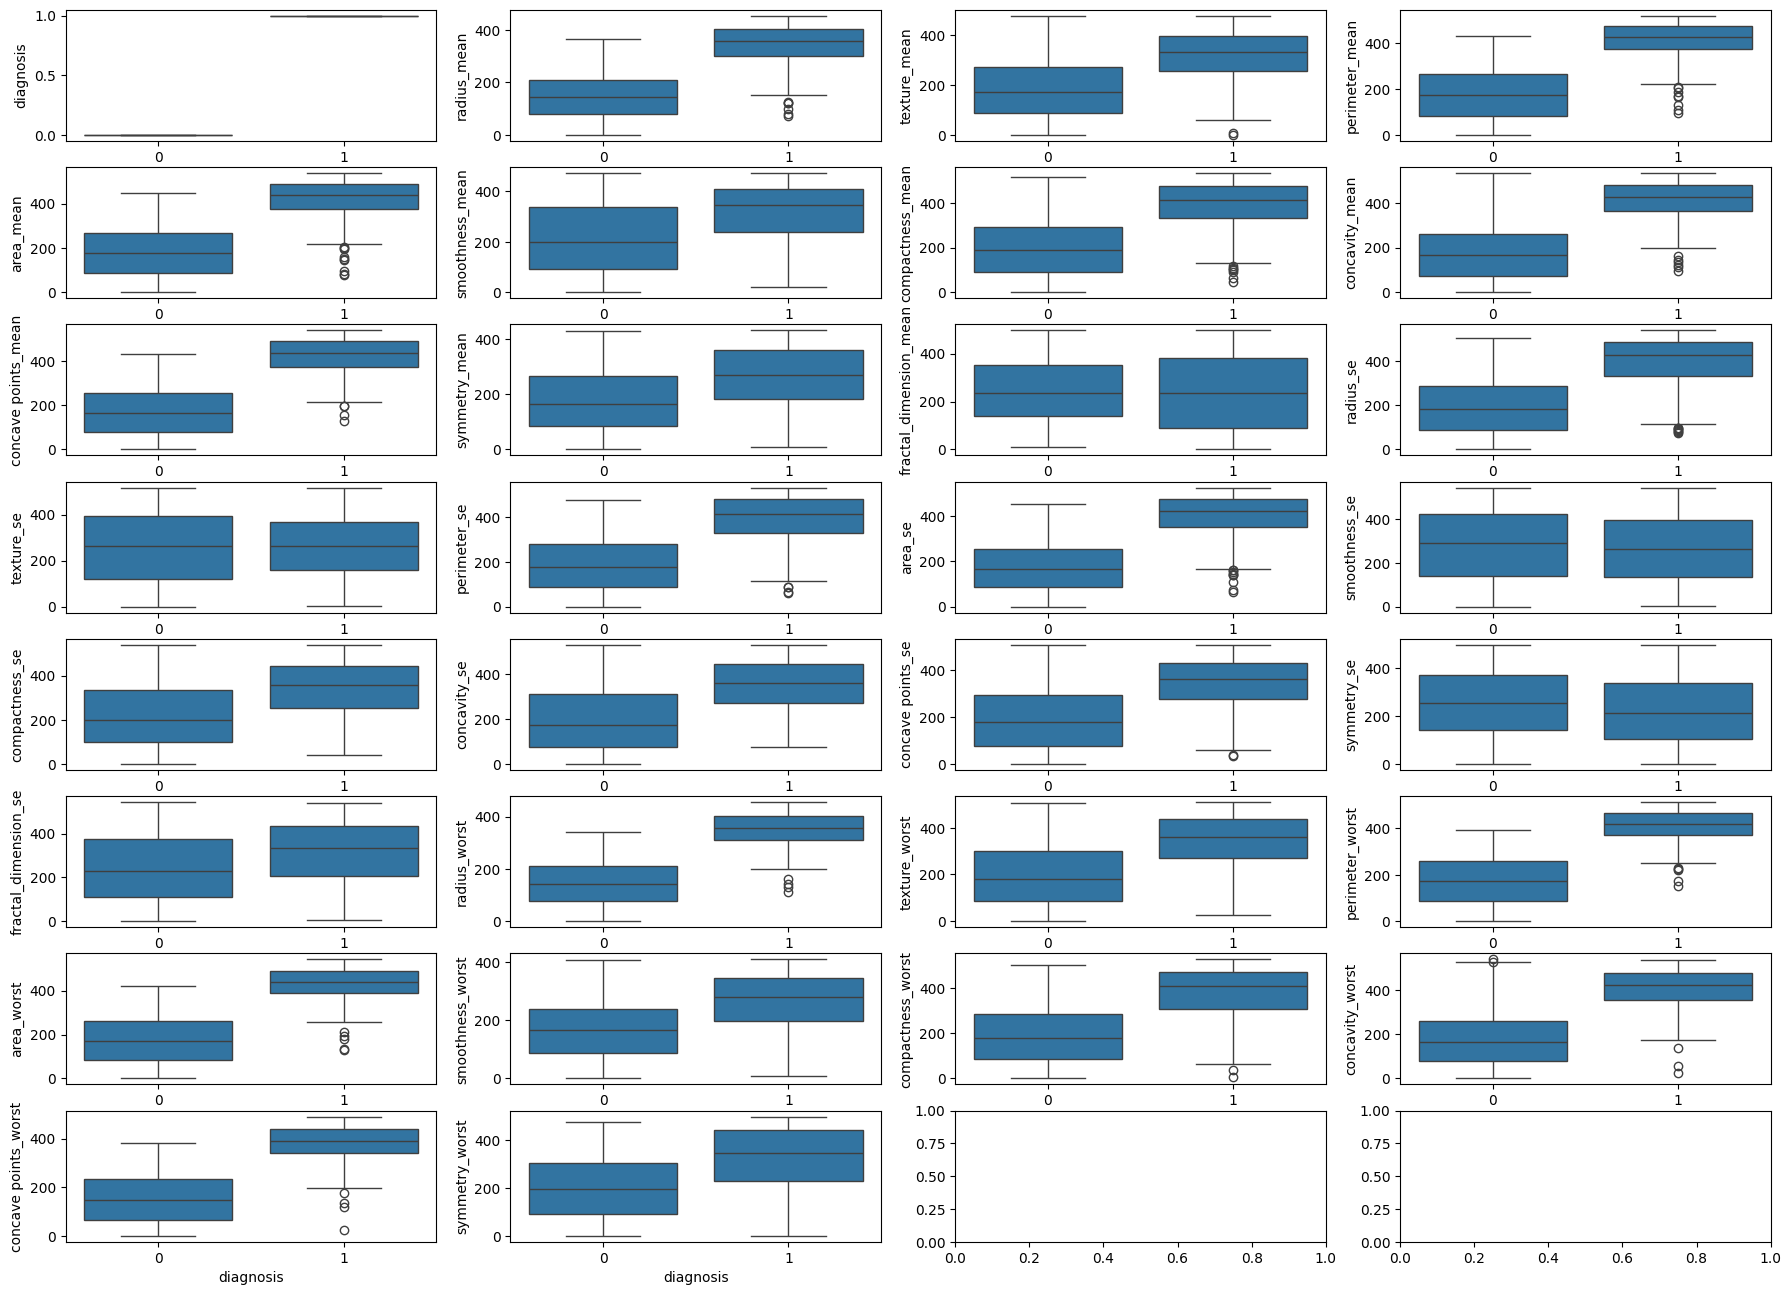

In [12]:
draw_multivarient_plot(data_label_encoded,8,4,"box")

In [13]:
#normalizing the data
X_norm=(X-X.mean())/(X.std())
#taking first 15 features for plotting graph
data_swarnplot=pd.concat([y,X_norm.iloc[:,:15]],axis=1)
data_swarnplot=pd.melt(data_swarnplot,id_vars="diagnosis",var_name="features",value_name='value')
data_swarnplot.head()

,diagnosis,features,value
0,M,radius_mean,1.096100
1,M,radius_mean,1.828212
2,M,radius_mean,1.578499
3,M,radius_mean,-0.768233
4,M,radius_mean,1.748758


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean'),
  Text(10, 0, 'radius_se'),
  Text(11, 0, 'texture_se'),
  Text(12, 0, 'perimeter_se'),
  Text(13, 0, 'area_se'),
  Text(14, 0, 'smoothness_se')])

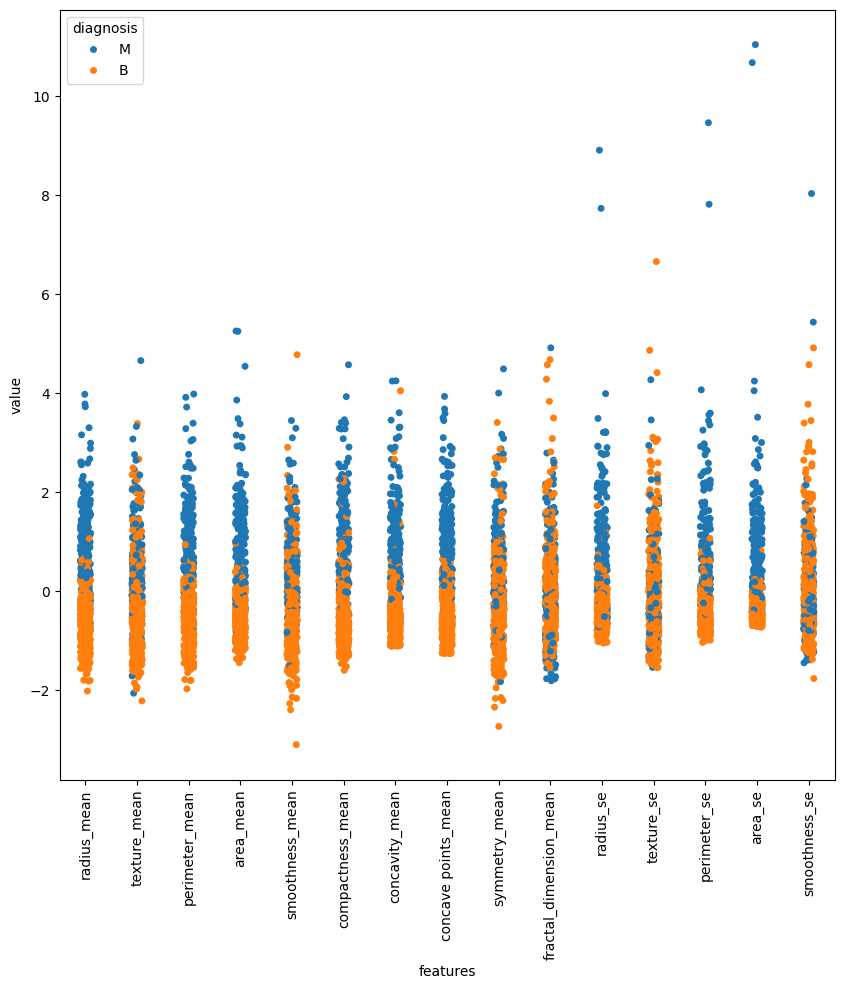

In [14]:
plt.figure(figsize=(10,10))
sns.stripplot(x="features",y="value",hue="diagnosis", data=data_swarnplot)
plt.xticks(rotation=90)

In [15]:
data_swarnplot=pd.concat([y,X_norm.iloc[:,15:]],axis=1)
data_swarnplot=pd.melt(data_swarnplot,id_vars="diagnosis",var_name="features",value_name='value')
data_swarnplot.head()

,diagnosis,features,value
0,M,compactness_se,1.315704
1,M,compactness_se,-0.692317
2,M,compactness_se,0.814257
3,M,compactness_se,2.741868
4,M,compactness_se,-0.048477


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'compactness_se'),
  Text(1, 0, 'concavity_se'),
  Text(2, 0, 'concave points_se'),
  Text(3, 0, 'symmetry_se'),
  Text(4, 0, 'fractal_dimension_se'),
  Text(5, 0, 'radius_worst'),
  Text(6, 0, 'texture_worst'),
  Text(7, 0, 'perimeter_worst'),
  Text(8, 0, 'area_worst'),
  Text(9, 0, 'smoothness_worst'),
  Text(10, 0, 'compactness_worst'),
  Text(11, 0, 'concavity_worst'),
  Text(12, 0, 'concave points_worst'),
  Text(13, 0, 'symmetry_worst'),
  Text(14, 0, 'fractal_dimension_worst')])

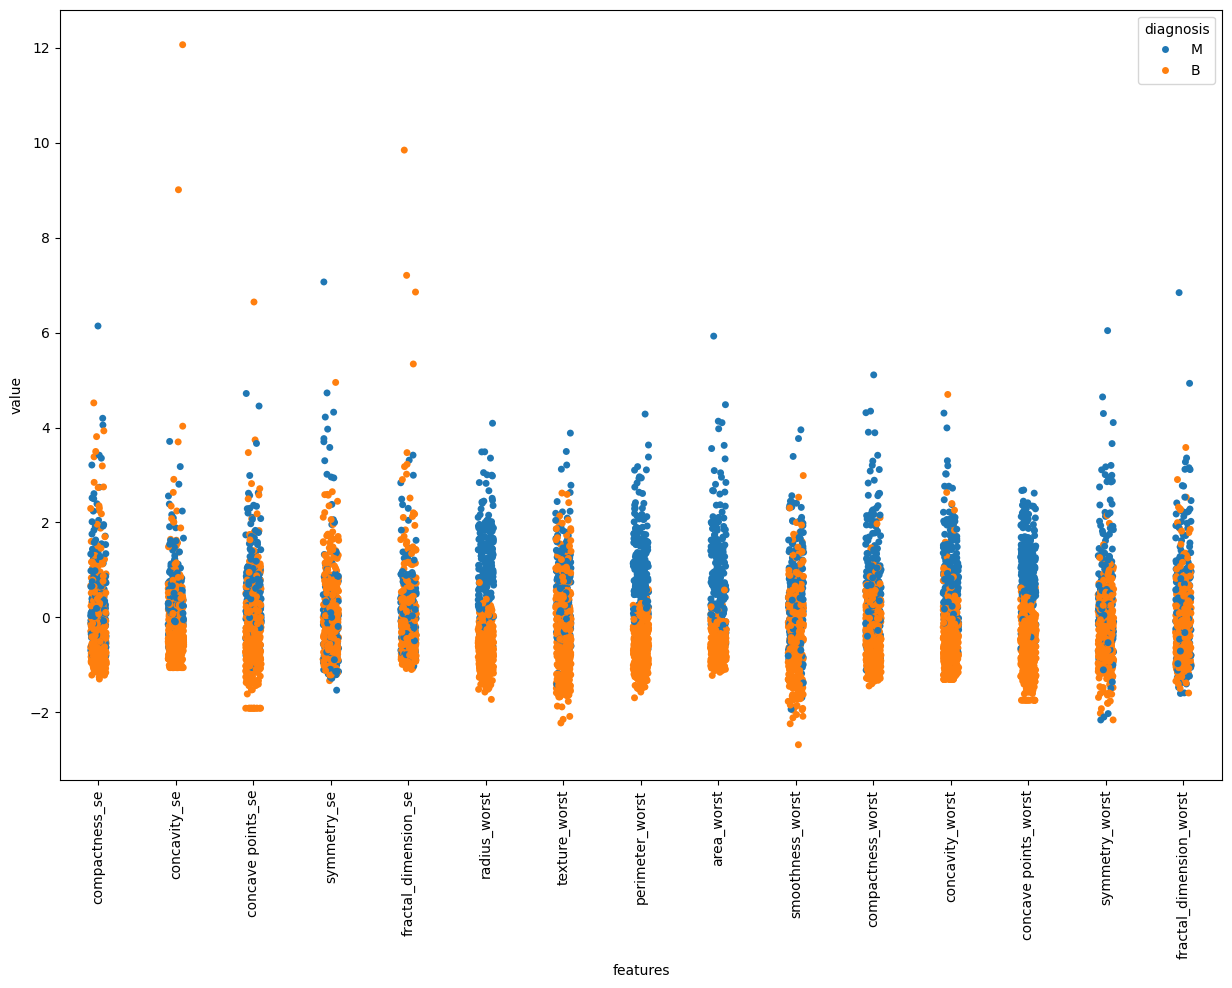

In [16]:
plt.figure(figsize=(15,10))
sns.stripplot(x="features",y="value",hue="diagnosis", data=data_swarnplot)
plt.xticks(rotation=90)

<Axes: >

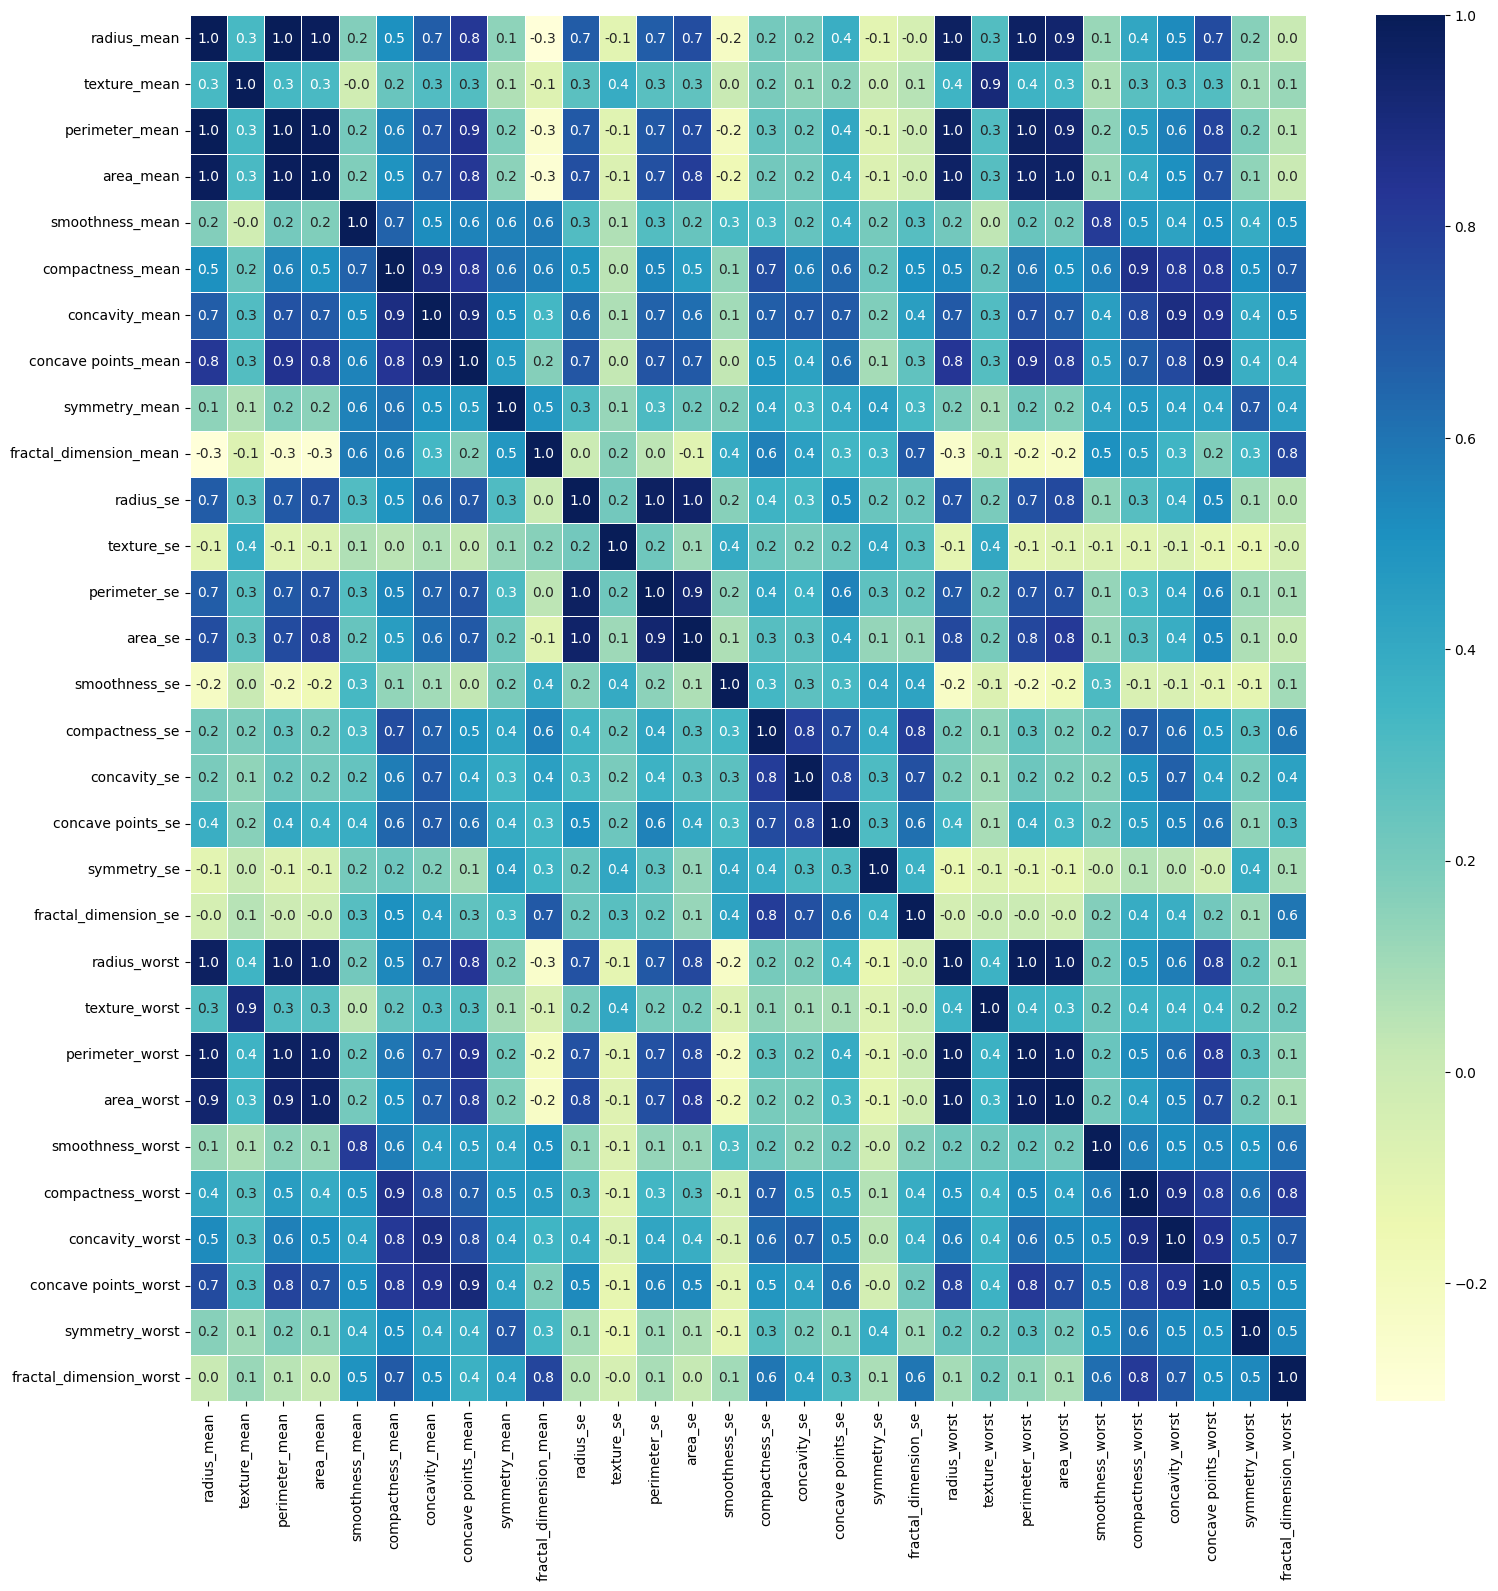

In [17]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(X.corr(),annot=True,cmap='YlGnBu',linewidth=.5,fmt='.1f',ax=ax)

In [18]:
#Series with the top three features that are most positively correlated with radius_mean.
data_label_encoded.corr()['radius_mean'].sort_values(ascending=False)[:3]

radius_mean       1.000000
area_mean         0.998156
perimeter_mean    0.995636
Name: radius_mean, dtype: float64

In [19]:
data_label_encoded.corr()['radius_se'].sort_values(ascending=False)[:3]

radius_se       1.000000
perimeter_se    0.958432
area_se         0.953795
Name: radius_se, dtype: float64

In [20]:
data_label_encoded.corr()['radius_worst'].sort_values(ascending=False)[:3]

radius_worst       1.000000
area_worst         0.997703
perimeter_worst    0.991621
Name: radius_worst, dtype: float64

In [21]:
data_label_encoded.corr()['texture_mean'].sort_values(ascending=False)[:3]

texture_mean     1.000000
texture_worst    0.909716
diagnosis        0.458623
Name: texture_mean, dtype: float64

PREPROCESSING:Dropping redundant features which has been identified 

In [22]:
X1=X.drop(['radius_mean','perimeter_mean','radius_se','perimeter_se','radius_worst','perimeter_worst'],axis=1)
X1.drop(['fractal_dimension_mean','smoothness_se','texture_se','symmetry_se','fractal_dimension_se'],axis=1,inplace=True)
X1.drop(['fractal_dimension_worst','concave points_mean','texture_worst','concavity_mean'],axis=1,inplace=True)
X1.drop(['smoothness_mean','symmetry_mean'],axis=1,inplace=True)

In [23]:
#standardising data again
X1=(X1-X1.mean())/(X1.std())

In [24]:
data_final=X1.copy()
data_final['diagnosis']=y
data_final=pd.melt(data_final,id_vars='diagnosis',var_name='features',value_name='value')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'texture_mean'),
  Text(1, 0, 'area_mean'),
  Text(2, 0, 'compactness_mean'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'compactness_se'),
  Text(5, 0, 'concavity_se'),
  Text(6, 0, 'concave points_se'),
  Text(7, 0, 'area_worst'),
  Text(8, 0, 'smoothness_worst'),
  Text(9, 0, 'compactness_worst'),
  Text(10, 0, 'concavity_worst'),
  Text(11, 0, 'concave points_worst'),
  Text(12, 0, 'symmetry_worst')])

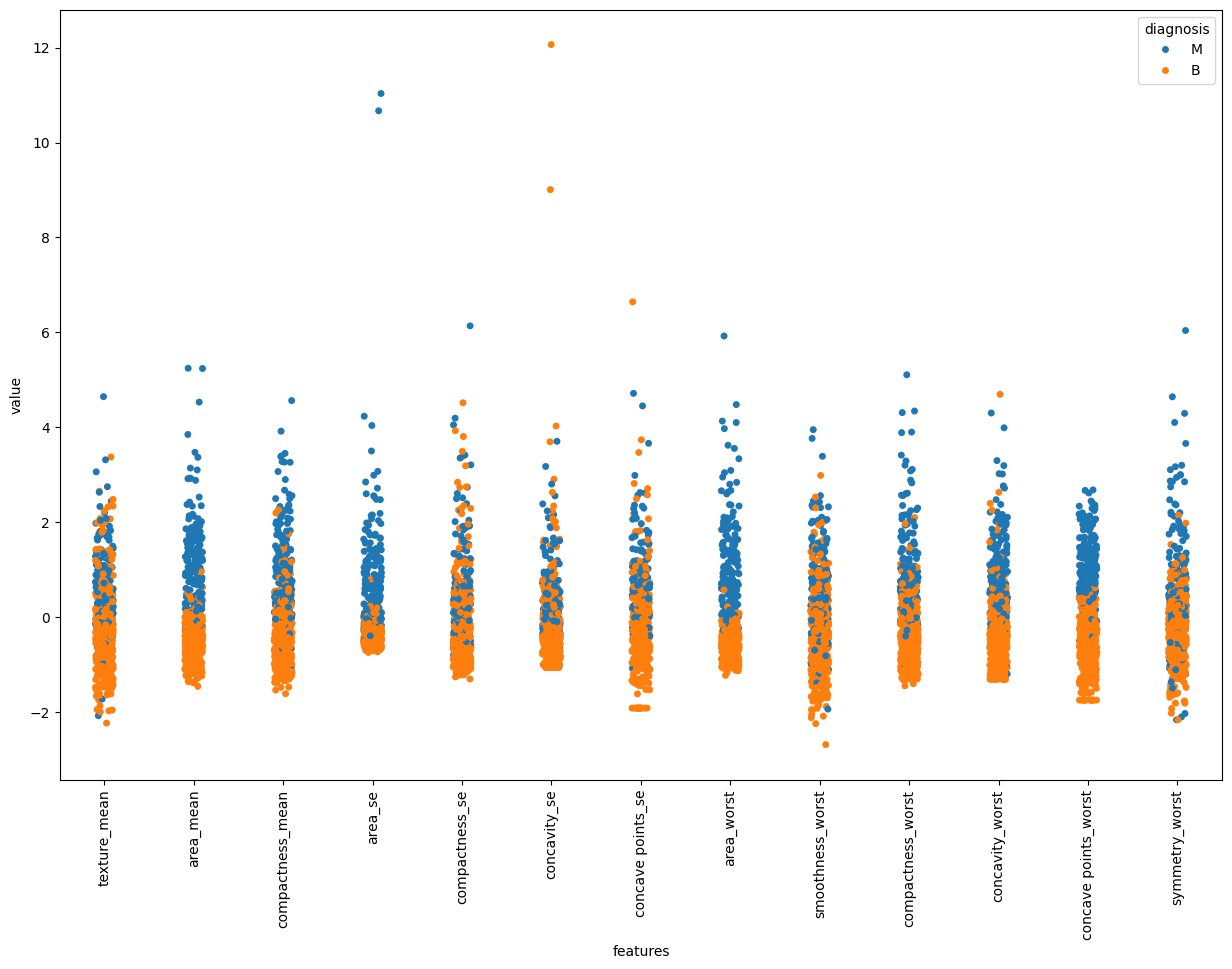

In [25]:
plt.figure(figsize=(15,10))
sns.stripplot(x="features",y="value",hue="diagnosis", data=data_final)
plt.xticks(rotation=90)

MODEL BUILDING

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.3)

Accuracy is 0.9590643274853801


<Axes: >

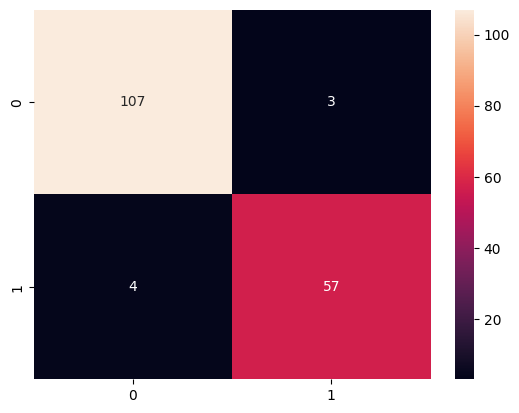

In [28]:
clf_rf=RandomForestClassifier(random_state=43)
clf_rf=clf_rf.fit(X_train,y_train)
ac=accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is',ac)
cm=confusion_matrix(y_test,clf_rf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [29]:
X_train.shape

(398, 13)

In [30]:
X_train.head()

,texture_mean,area_mean,compactness_mean,area_se,compactness_se,concavity_se,concave points_se,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
193,1.760123,-0.504353,0.586203,-0.129632,0.724354,0.190031,0.229141,-0.196157,2.020434,1.374983,0.816355,0.476079,0.507931
426,-1.002002,-0.912976,-0.057580,-0.430131,0.736639,0.686949,0.136762,-0.773123,0.014515,0.288140,0.104070,-0.327179,0.192742
483,-0.383547,-0.238095,-0.469034,-0.432988,-0.965600,-0.494060,-0.415400,-0.340881,-0.546091,-0.760568,-0.469689,-0.362626,-0.618670
207,0.225609,0.708727,-0.592678,0.618208,-0.583428,-0.411903,-0.091752,0.578577,-0.931508,-0.671586,-0.378616,-0.076161,0.604913
232,3.376013,-0.761803,-1.298947,-0.546857,-1.042269,-0.949800,-1.357658,-0.719554,-1.420287,-1.178462,-1.193574,-1.286828,0.016558


Accuracy is 0.9707602339181286
0.9736376339077782


<Axes: >

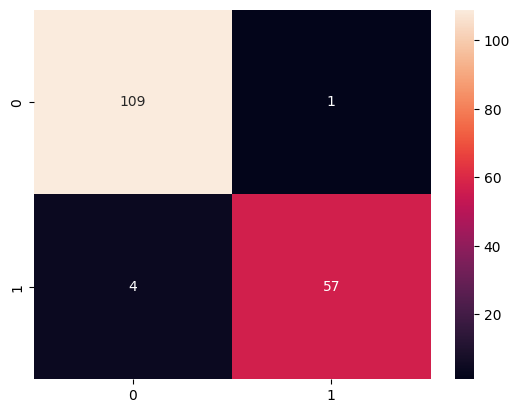

In [32]:
clf_svm=svm.SVC(gamma='scale').fit(X_train,y_train)
ac=accuracy_score(y_test,clf_svm.predict(X_test))
print('Accuracy is',ac)
scores_svm=cross_val_score(clf_svm,X1,y,cv=5)
print(scores_svm.mean())
cm=confusion_matrix(y_test,clf_svm.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is 0.9707602339181286
0.952522900170781


<Axes: >

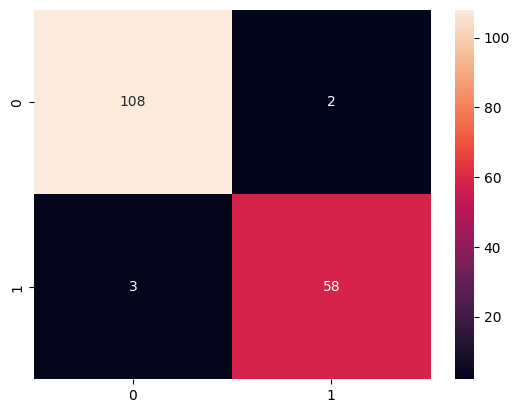

In [33]:
clf_knn=KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
ac=accuracy_score(y_test,clf_knn.predict(X_test))
print('Accuracy is',ac)
scores_knn=cross_val_score(clf_knn,X1,y,cv=5)
print(scores_knn.mean())
cm=confusion_matrix(y_test,clf_knn.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is 0.9415204678362573
0.9261450085390466


<Axes: >

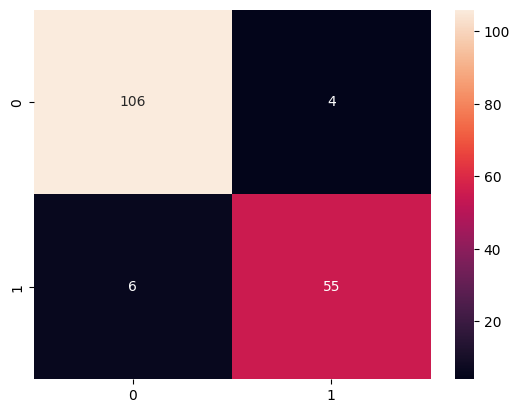

In [34]:
clf_df=DecisionTreeClassifier().fit(X_train,y_train)
ac=accuracy_score(y_test,clf_df.predict(X_test))
print('Accuracy is',ac)
scores_df=cross_val_score(clf_df,X1,y,cv=5)
print(scores_df.mean())
cm=confusion_matrix(y_test,clf_df.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")